# <a id='toc1_'></a>[Sabrina del Rosal](#toc0_)
### <a id='toc1_1_1_'></a>[Capstone Project: Sprint 2](#toc0_)
# <a id='toc2_'></a>[Racehorses Risk of Injury Predictions](#toc0_)

#### <a id='toc2_1_1_1_'></a>[Introduction](#toc0_)

Horse racing is a flourishing industry filled with fanatics who go to enjoy the race, bet, or be an inclusive part of it by owning racehorses. However, these horses undergo a lot of intense activity and can worsen their performance through time based on age, injury, and other factors. It is difficult to know exactly when and how a horse may begin to lower its winning chances throughout the races. A well performing predictive model could help provide valuable insights for trainers to prevent them from over pushing their horses causing performance decline and illness.

##### <a id='toc2_1_1_1_1_'></a>[Big Idea](#toc0_)
 
A machine learning model could use historical race data, biometrics records of individual racehorses, track intensity and/or conditions, and jockey statistics to help find patterns that may be associated with stress or risk of injury. By highlighting early indicators of fatigue, or poor performance, the model may be a crucial tool for racehorse trainers. This will be fairly similar to the injury-prevention models I have seen used for athletes playing basketball or football, for example. It can eventually allow trainers to have an idea as to when a horse might need to wean off racing for a bit in order to prevent massive injury that can lead to retirement. 
	Firstly, creating a model that can help predict winning positions will be in place to see if there are any trends in number of races a horse can feasible do well in. Then, biometric data will begin to play a part to see if height, weight, age, as well as pedigree plays significant roles in winning. We can look at conditions of track and weather as well to further investigate. If anything, I plan to begin with the most current year and create a model using that smaller dataset if needed to start small.

##### <a id='toc2_1_1_1_2_'></a>[Sprint 2:](#toc0_)
Jupyter Notebook: Sprint 1 uncovered learnings regarding data quality, feature engineering and other preprocessing concerns. In sprint 2 you will incorporate your learnings to prepare your dataset for modeling. You will also conduct a more thorough round of EDA, addressing questions you formulated upon taking a first pass over the data in Sprint 1. In addition to preprocessing and EDA, this notebook should include baseline models to set the stage for advanced modeling in the final sprint. As you develop baseline models, it is also important to articulate a model evaluation framework that accurately reflects the practical use case of your models.

**Table of contents**<a id='toc0_'></a>    
- [Sabrina del Rosal](#toc1_)    
    - [Capstone Project: Sprint 2](#toc1_1_1_)    
- [Racehorses Risk of Injury Predictions](#toc2_)    
      - [Introduction](#toc2_1_1_1_)    
        - [Big Idea](#toc2_1_1_1_1_)    
        - [Sprint 2:](#toc2_1_1_1_2_)    
    - [Downloading Data](#toc2_1_2_)    
    - [Exploratory Data Analysis](#toc2_1_3_)    
      - [Creating our Dependent Variable](#toc2_1_3_1_)    
    - [Visualize Distributions](#toc2_1_4_)    
    - [Correlations to Dependent Variable](#toc2_1_5_)    
    - [Key Variables](#toc2_1_6_)    
      - [Injury Risk by Age](#toc2_1_6_1_)    
      - [Count of Injury by Track Condition](#toc2_1_6_2_)    
      - [Proportion of Injuries by Track Condition](#toc2_1_6_3_)    
      - [Distance vs. Injury](#toc2_1_6_4_)    
      - [Handicap & Weight Distributions](#toc2_1_6_5_)    
      - [Time Series Inury Trends : Count](#toc2_1_6_6_)    
      - [Time Series Inury Trends : Proportion](#toc2_1_6_7_)    
      - [Distribution of Days Rested with Injury Count](#toc2_1_6_8_)    
      - [Injury Based on Number of Races / Year](#toc2_1_6_9_)    
      - [Subset of Horses Racing 25+ with No Injuries](#toc2_1_6_10_)    
        - [Analyzing Their Track Conditions](#toc2_1_6_10_1_)    
    - [Saving Data for Modelling](#toc2_1_7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc2_1_2_'></a>[Downloading Data](#toc0_)

In [182]:
# import any necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [183]:
races_horses_df = pd.read_csv("../data/races_horses_df.csv")
horse_names = pd.read_csv("../data/horse_names.csv")

In [184]:
races_horses_df.info()

# datetime column doesn't save 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105435 entries, 0 to 105434
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   rid        105435 non-null  int64  
 1   age        105435 non-null  int64  
 2   saddle     105435 non-null  float64
 3   position   105435 non-null  int64  
 4   OR         105435 non-null  int64  
 5   weight     105435 non-null  int64  
 6   Horse_ID   105435 non-null  int64  
 7   date       105435 non-null  object 
 8   condition  105435 non-null  object 
 9   hurdles    105435 non-null  int64  
 10  metric     105435 non-null  float64
 11  ncond      105435 non-null  int64  
 12  class      105435 non-null  int64  
 13  fences     105435 non-null  int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 11.3+ MB


In [ ]:
# convert it back to datetime

races_horses_df['date'] = pd.to_datetime(races_horses_df['date'])


### <a id='toc2_1_3_'></a>[Exploratory Data Analysis](#toc0_)

Action Plan :
1. visualize distributions
2. explore trends in data


In [186]:
# summary statistics to quickly look at what we have....

races_horses_df.describe()


,rid,age,saddle,position,OR,weight,Horse_ID,date,hurdles,metric,ncond,class,fences
count,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000,105435,105435.000000,105435.000000,105435.000000,105435.000000,105435.000000
mean,222561.609276,5.108436,7.374800,6.210442,48.077669,61.252734,11240.219168,2000-07-01 19:51:22.509603072,2.354636,2652.618277,4.240214,3.109290,2.054033
min,105.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000-01-01 00:00:00,0.000000,1005.000000,0.000000,0.000000,0.000000
25%,99790.000000,3.000000,3.000000,2.000000,0.000000,55.000000,5606.000000,2000-04-23 00:00:00,0.000000,1407.000000,1.000000,0.000000,0.000000
50%,243399.000000,5.000000,6.000000,5.000000,55.000000,60.000000,11270.000000,2000-07-01 00:00:00,0.000000,2413.000000,2.000000,4.000000,0.000000
75%,321025.000000,7.000000,10.000000,9.000000,79.000000,68.000000,16827.000000,2000-09-16 00:00:00,0.000000,3519.500000,8.000000,5.000000,0.000000
max,401362.000000,17.000000,40.000000,35.000000,177.000000,80.000000,22395.000000,2000-12-31 00:00:00,16.000000,7240.000000,18.000000,6.000000,32.000000
std,119016.940375,2.345969,5.041225,4.846308,40.168695,7.815255,6477.033029,NaN,4.292229,1251.601640,3.686826,2.166429,5.447060


In [ ]:
# let's do some basic analysis now 

races_horses_df.head(5)

,rid,age,saddle,position,OR,weight,Horse_ID,date,condition,hurdles,metric,ncond,class,fences
0,270318,7,14.0,1,0,70,15068,2000-01-01,Soft To Heavy,0,3218.0,12,0,0
1,270318,8,1.0,2,0,76,1259,2000-01-01,Soft To Heavy,0,3218.0,12,0,0
2,270318,6,8.0,3,0,72,3726,2000-01-01,Soft To Heavy,0,3218.0,12,0,0
3,270318,6,7.0,4,0,70,1536,2000-01-01,Soft To Heavy,0,3218.0,12,0,0
4,270318,7,3.0,5,0,73,12233,2000-01-01,Soft To Heavy,0,3218.0,12,0,0


#### <a id='toc2_1_3_1_'></a>[Creating our Dependent Variable](#toc0_)

In [188]:
# let's create our dependent variable column RISK OF INJURY
# if position is 0 then Risk of Injury column will be '1'

races_horses_df["RiskOfInjury"] = (races_horses_df["position"] == 0).astype(int)

In [189]:
# making sure it is only 0's and 1's

races_horses_df["RiskOfInjury"].unique()

array([0, 1])

In [190]:
# dependent variable (risk of injury) would be position

races_horses_df["RiskOfInjury"]

0         0
1         0
2         0
3         0
4         0
         ..
105430    0
105431    0
105432    0
105433    0
105434    1
Name: RiskOfInjury, Length: 105435, dtype: int64

In [ ]:
# sanity check 

races_horses_df.head(2)

,rid,age,saddle,position,OR,weight,Horse_ID,date,condition,hurdles,metric,ncond,class,fences,RiskOfInjury
0,270318,7,14.0,1,0,70,15068,2000-01-01,Soft To Heavy,0,3218.0,12,0,0,0
1,270318,8,1.0,2,0,76,1259,2000-01-01,Soft To Heavy,0,3218.0,12,0,0,0


### <a id='toc2_1_4_'></a>[Visualize Distributions](#toc0_)

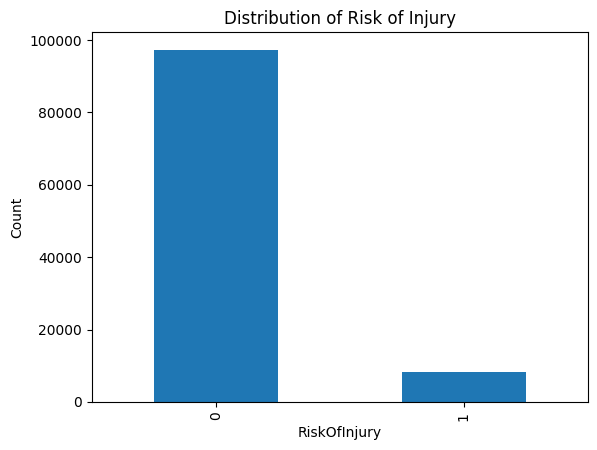

In [192]:
# checking its distribution, not normal ... will have to continue to look at assumptions -- better to run SMOTE perhaps for modelling...

races_horses_df["RiskOfInjury"].value_counts().plot(kind='bar')

plt.title('Distribution of Risk of Injury')
plt.ylabel("Count")

plt.show()

We can see that our overall data is largely skewed, having nowhere near a balanced set of horses injured versus non injured. While we do our exploration this is fine; however important to note for modelling, as if we start to discover difficulty with model accuracy, performing SMOTE to balance the classes might benefit our final model.

In [193]:
# checking the proportions of negative and positive

races_horses_df["RiskOfInjury"].value_counts(normalize=True) * 100

RiskOfInjury
0    92.294779
1     7.705221
Name: proportion, dtype: float64

In [ ]:
# checking counts of 0's and 1's

races_horses_df["RiskOfInjury"].value_counts()

RiskOfInjury
0    97311
1     8124
Name: count, dtype: int64

### <a id='toc2_1_5_'></a>[Correlations to Dependent Variable](#toc0_)

In [195]:
# grab the correlations

correlations = races_horses_df.drop(columns="condition").corr()["RiskOfInjury"].sort_values(ascending=False)

print(correlations)

# no high correlations between any and risk of injury....we will continue to work into statistical analysis later

RiskOfInjury    1.000000
metric          0.331778
fences          0.313660
age             0.255698
weight          0.255566
hurdles         0.120878
ncond           0.064098
OR              0.012560
rid             0.008642
saddle          0.001116
Horse_ID       -0.007746
class          -0.034539
date           -0.061182
position       -0.370269
Name: RiskOfInjury, dtype: float64


Here, we see that there are no significant correlations between any of our features and risk of injury which is good to note for when we get to our modelling.

### <a id='toc2_1_6_'></a>[Key Variables](#toc0_)

#### <a id='toc2_1_6_1_'></a>[Injury Risk by Age](#toc0_)

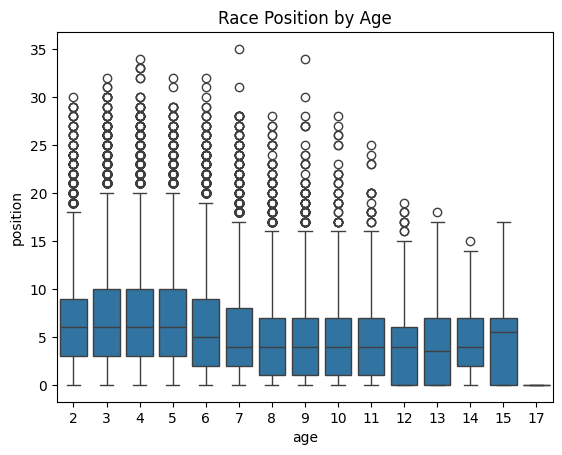

In [196]:
# let's look at injury risk by age 

sns.boxplot(x='age', y='position', data=races_horses_df)
plt.title("Race Position by Age")
plt.show()

Risk injury based off of age seems to be pretty evenely distributed with some outliers and the eldest age of 17 being the most frequent to encounter injuries, as expected.

#### <a id='toc2_1_6_2_'></a>[Count of Injury by Track Condition](#toc0_)

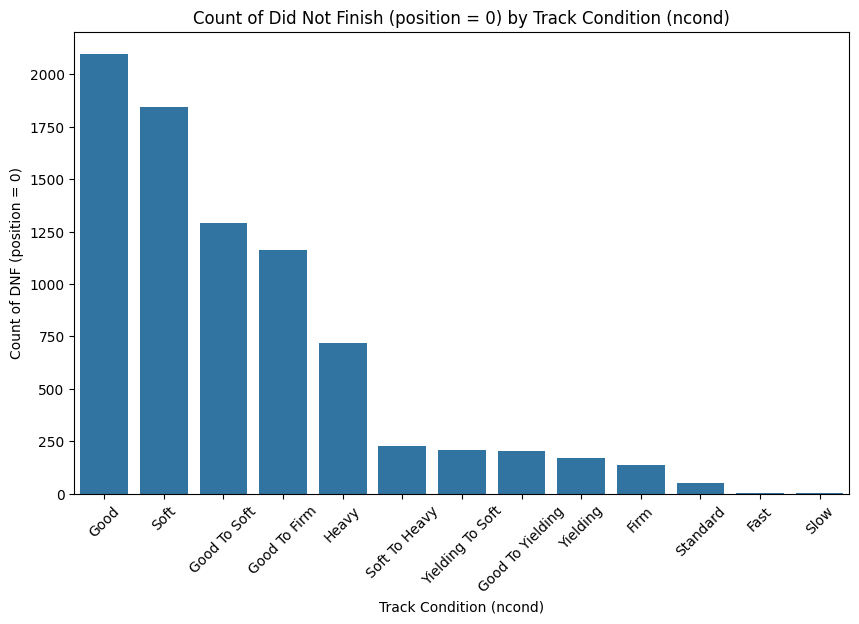

In [ ]:
# race conditions with injury

# only cases where position == 0 (did not finish)
df_dnf = races_horses_df[races_horses_df["position"] == 0]

dnf_count = df_dnf["condition"].value_counts()

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=dnf_count.index, y=dnf_count.values)

plt.title("Count of Did Not Finish (position = 0) by Track Condition (ncond)")
plt.xlabel("Track Condition (ncond)")
plt.ylabel("Count of DNF (position = 0)")
plt.xticks(rotation = 45)
plt.show()

#  1 is good condition , 5 is soft condition , 10 is good to soft condition
#  this can be because most races are on these conditions....let's see if we can get a better "truer" understanding

#### <a id='toc2_1_6_3_'></a>[Proportion of Injuries by Track Condition](#toc0_)

Here, this graph may be misleading as it is simply the count, so we will turn this into a porportion to have a real understanding of how track conditions affect horse injuries.

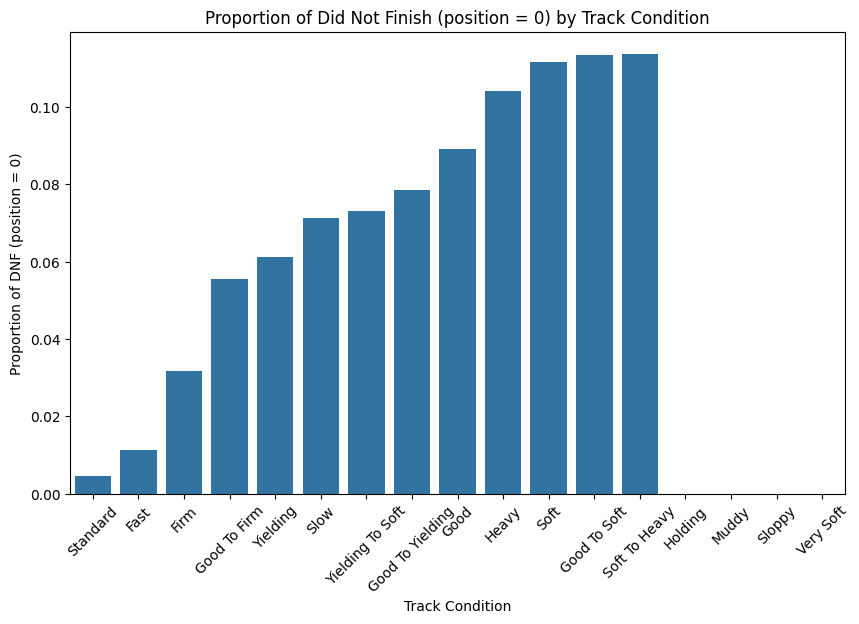

In [198]:
# going to do similar but calculating a proportion to use for better understanding

# total races per ncond
totalraces = races_horses_df["condition"].value_counts()

# position 0 per ncond
totalDNF = races_horses_df[races_horses_df["position"] == 0]["condition"].value_counts()

# proportion of DNF for each ncond
dnfProportion = (totalDNF / totalraces).sort_values(ascending=True)

# plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=dnfProportion.index, y=dnfProportion.values , order=dnfProportion.index)
plt.title("Proportion of Did Not Finish (position = 0) by Track Condition")
plt.xlabel("Track Condition")
plt.ylabel("Proportion of DNF (position = 0)")
plt.xticks(rotation = 45)

plt.show()

Here we see that the most frequent occurences of injuries land on track conditions surrounding soft surfaces which reading into literature one can find that horses with sensitive tendons suffer more on soft surfaces. 

In [ ]:
# let's see the hard numbers to better understand visual

dnfProportion

# 11% DNF for conditions 12 soft to heavy , 10 good to soft , 5 soft condition
# these are most important conditions for risk of injury 

condition
Standard            0.004703
Fast                0.011236
Firm                0.031779
Good To Firm        0.055487
Yielding            0.061210
Slow                0.071429
Yielding To Soft    0.073213
Good To Yielding    0.078560
Good                0.089253
Heavy               0.104143
Soft                0.111561
Good To Soft        0.113363
Soft To Heavy       0.113739
Holding                  NaN
Muddy                    NaN
Sloppy                   NaN
Very Soft                NaN
Name: count, dtype: float64

#### <a id='toc2_1_6_4_'></a>[Distance vs. Injury](#toc0_)

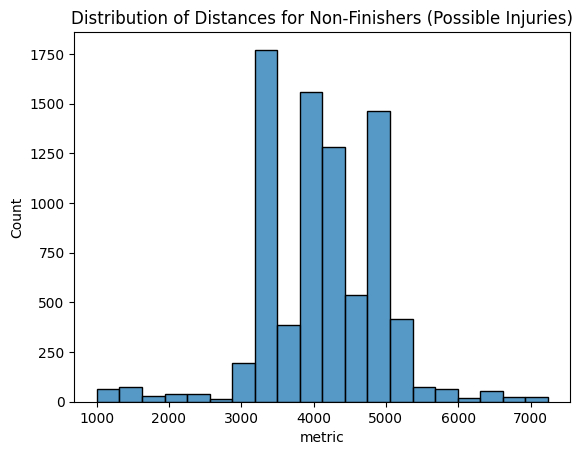

In [200]:
# distance with injury

sns.histplot(races_horses_df[races_horses_df['position'] == (0)]['metric'], bins=20)
plt.title("Distribution of Distances for Non-Finishers (Possible Injuries)")
plt.show()

We can also see the injuries of horses lie mostly within races of around 3000 to 5000 meters.

In [ ]:
races_horses_df.head(3)

,rid,age,saddle,position,OR,weight,Horse_ID,date,condition,hurdles,metric,ncond,class,fences,RiskOfInjury
0,270318,7,14.0,1,0,70,15068,2000-01-01,Soft To Heavy,0,3218.0,12,0,0,0
1,270318,8,1.0,2,0,76,1259,2000-01-01,Soft To Heavy,0,3218.0,12,0,0,0
2,270318,6,8.0,3,0,72,3726,2000-01-01,Soft To Heavy,0,3218.0,12,0,0,0


#### <a id='toc2_1_6_5_'></a>[Handicap & Weight Distributions](#toc0_)

In [202]:
# horses handicap distribution: Horses with higher handicap weights are usually stronger and more competitive, not necessarily heavier in body weight.

# how much are horses carrying? 

print(races_horses_df["weight"].describe())
print(races_horses_df["weight"].unique())

# mean = 61.25 kg 

count    105435.000000
mean         61.252734
std           7.815255
min           0.000000
25%          55.000000
50%          60.000000
75%          68.000000
max          80.000000
Name: weight, dtype: float64
[70 76 72 73 74 71 58 69 65 63 60 68 62 67 66 59 75 53 57 56 52 49 45 51
 61 64 54 55 50 48 46 47 77 78 79 80 44  0]


In [203]:
# average weight carried by horse

avg_weightcarried = races_horses_df.groupby("Horse_ID")["weight"].mean().sort_values(ascending = False)

# top 10 

print(avg_weightcarried.head(10))

Horse_ID
17950    79.00
15946    79.00
6288     78.25
3512     78.00
3740     78.00
17678    78.00
6443     78.00
15644    78.00
13396    78.00
10636    78.00
Name: weight, dtype: float64


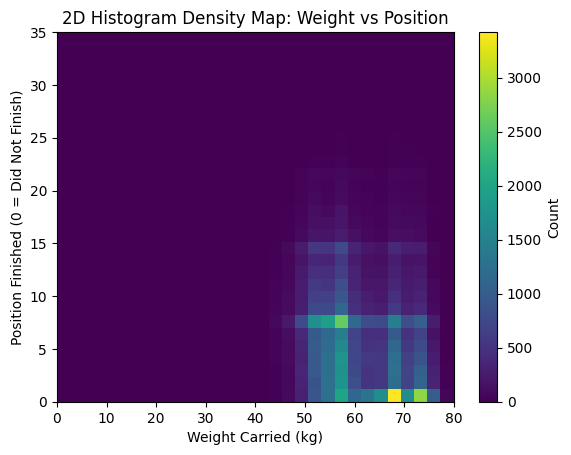

In [204]:
# weight vs finishing position

plt.hist2d(
    races_horses_df["weight"], 
    races_horses_df["position"], 
    bins=(30, 30), 
)
plt.colorbar(label="Count")
plt.xlabel("Weight Carried (kg)")
plt.ylabel("Position Finished (0 = Did Not Finish)")
plt.title("2D Histogram Density Map: Weight vs Position")
plt.show()

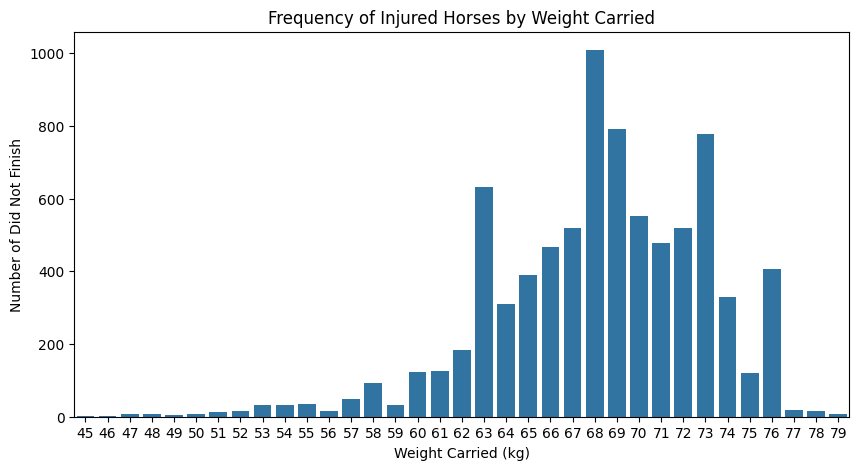

In [205]:
# look at a graph when position is only 0

failed_horses = races_horses_df[races_horses_df["position"] == 0]

# frequency per weight category

freq_weights = failed_horses["weight"].value_counts().sort_index()

# plot 

plt.figure(figsize=(10, 5))
sns.barplot(x=freq_weights.index, y=freq_weights.values)

plt.xlabel("Weight Carried (kg)")
plt.ylabel("Number of Did Not Finish")
plt.title("Frequency of Injured Horses by Weight Carried")

plt.show()

# 68 kg is the highest 

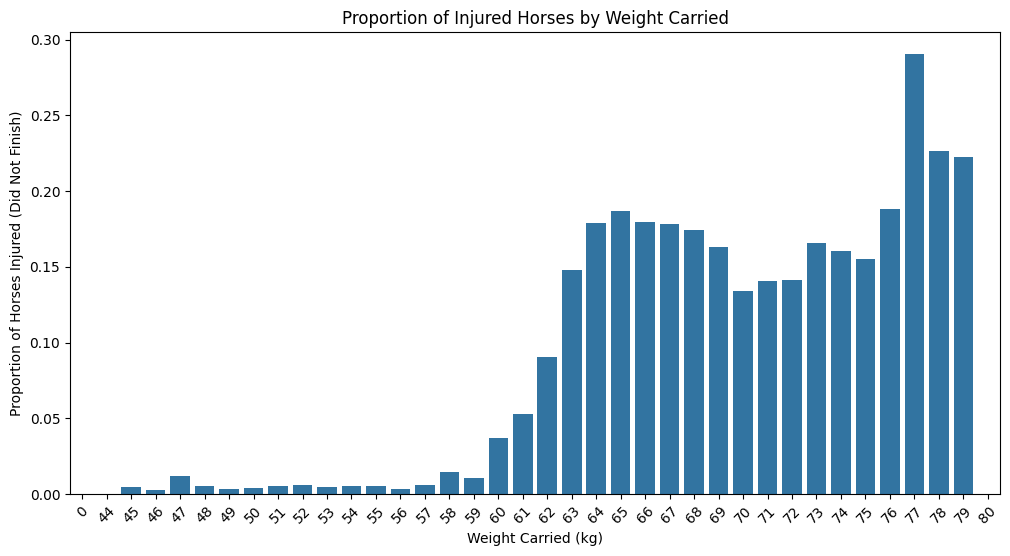

In [206]:
# same but in a proportion

failed_horses = races_horses_df[races_horses_df["position"] == 0]

# count injured horses per weight
injuredperweight = failed_horses["weight"].value_counts().sort_index()

# total horses per weight (including those that finished)
totalperweight = races_horses_df["weight"].value_counts().sort_index()

# calculate proportion
proportioninjured = (injuredperweight / totalperweight)

# plot
plt.figure(figsize=(12, 6))

sns.barplot(x=proportioninjured.index, y=proportioninjured.values)
plt.xlabel("Weight Carried (kg)")
plt.ylabel("Proportion of Horses Injured (Did Not Finish)")
plt.title("Proportion of Injured Horses by Weight Carried")
plt.xticks(rotation = 45)
plt.show()


With all of this information regarding 'handicap' and 'weight' we can come to some important inferences regarding our dataset. The handicap system works in the UK by assigning horses with the highest ratings to carry the heaviest weights as a way to "even out" the playing field. This weight includes the jockey, saddle, equipment, lead weights, etc. Here we see that injufies start to spike up after 76 kgs. We knoe that in traditional flat racing make handicap weight is 50 - 65 kg and in national hunt racing it lands around 60 - 75 kg. This means that these horses are most likley getting injured in amateur races where the handicap weight goes over 76 kgs.

In [ ]:
# horses carrying 77 kg or more
heavy_horses = races_horses_df[races_horses_df["weight"] >= 77]

print(heavy_horses)

           rid  age  saddle  position   OR  weight  Horse_ID       date  \
701     172869    7     1.0         1  111      77      8252 2000-01-03   
1719     16464    8     1.0         1  128      77     15580 2000-01-07   
5113    377306    6     3.0         4    0      78     11483 2000-01-23   
6091    181398    4     1.0         1   57      78     19592 2000-01-28   
6890    100524    6     1.0         1  100      77     16367 2000-02-01   
...        ...  ...     ...       ...  ...     ...       ...        ...   
96141   290214    8     1.0         3   97      79     17145 2000-11-16   
96142   290214    5     2.0         4   96      78      4661 2000-11-16   
96803   270658    5     1.0         6  104      77     11159 2000-11-18   
97971   198740    5     1.0         7   87      77     11788 2000-11-21   
100504   84312    6     2.0         3    0      78     21989 2000-12-02   

               condition  hurdles  metric  ncond  class  fences  RiskOfInjury  
701                

#### <a id='toc2_1_6_6_'></a>[Time Series Inury Trends : Count](#toc0_)

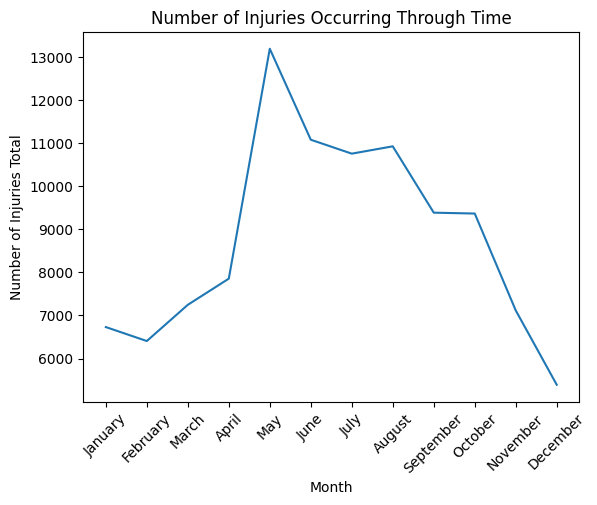

In [208]:
# times series injury trends over time 

injury_over_time = races_horses_df.groupby(races_horses_df["date"].dt.month_name()).size().reset_index(name="InjuryCount")

# month names 
months_order = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]
injury_over_time["date"] = pd.Categorical(injury_over_time["date"], categories=months_order, ordered=True)
injury_over_time = injury_over_time.sort_values("date")

# plot 

sns.lineplot(data=injury_over_time, x="date", y="InjuryCount")
plt.title("Number of Injuries Occurring Through Time")
plt.xlabel("Month")
plt.ylabel("Number of Injuries Total")
plt.xticks(rotation=45)
plt.show()

# May has highest spike of injuries (summer overall) ; may be due to most races occuring in summer? let's do porportion to see


We see a spike of injuries in May and the summer overall; however this can be reflective of more races in the summer so let us check out the proportions to get a better idea.

#### <a id='toc2_1_6_7_'></a>[Time Series Inury Trends : Proportion](#toc0_)

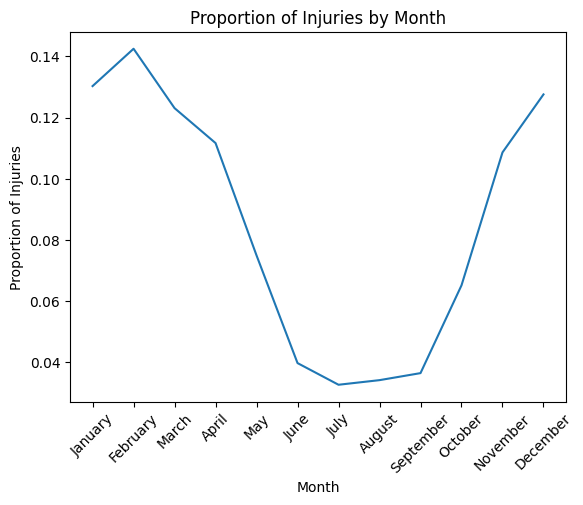

In [209]:
# proportional injury rate by month

# injured by month
injured_over_time = races_horses_df.groupby(races_horses_df["date"].dt.month_name())["RiskOfInjury"].sum().reset_index(name="InjuryCount")

# total by month
raced_over_time = races_horses_df.groupby(races_horses_df["date"].dt.month_name())["Horse_ID"].count().reset_index(name="TotalHorsesRaced")

# proportion 
injury_frequency = pd.merge(injured_over_time, raced_over_time, on="date")
injury_frequency["InjuryFrequency"] = injury_frequency["InjuryCount"] / injury_frequency["TotalHorsesRaced"]

# months
months_order = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]
injury_frequency["date"] = pd.Categorical(injury_frequency["date"], categories=months_order, ordered=True)
injury_frequency = injury_frequency.sort_values("date")

# plot
sns.lineplot(data=injury_frequency, x="date", y="InjuryFrequency")
plt.title("Proportion of Injuries by Month")
plt.xlabel("Month")
plt.ylabel("Proportion of Injuries")
plt.xticks(rotation=45)
plt.show()

# now we see that ACTUALLY injuries occur mostly towarads the winter months!! important discovery!!


This is very important because now we see that there is in fact more injuries per race during the winter months. Through literature, we discovered that this can be due to winter related risks such as Muscle Stiffness , Reduced Flexibility , Slippery due to Ice , Longer Warm-Ups , and Reduced Training.

In [ ]:
# let's take a look at dataframe again just to reset

races_horses_df.head(4)

,rid,age,saddle,position,OR,weight,Horse_ID,date,condition,hurdles,metric,ncond,class,fences,RiskOfInjury
0,270318,7,14.0,1,0,70,15068,2000-01-01,Soft To Heavy,0,3218.0,12,0,0,0
1,270318,8,1.0,2,0,76,1259,2000-01-01,Soft To Heavy,0,3218.0,12,0,0,0
2,270318,6,8.0,3,0,72,3726,2000-01-01,Soft To Heavy,0,3218.0,12,0,0,0
3,270318,6,7.0,4,0,70,1536,2000-01-01,Soft To Heavy,0,3218.0,12,0,0,0


#### <a id='toc2_1_6_8_'></a>[Distribution of Days Rested with Injury Count](#toc0_)

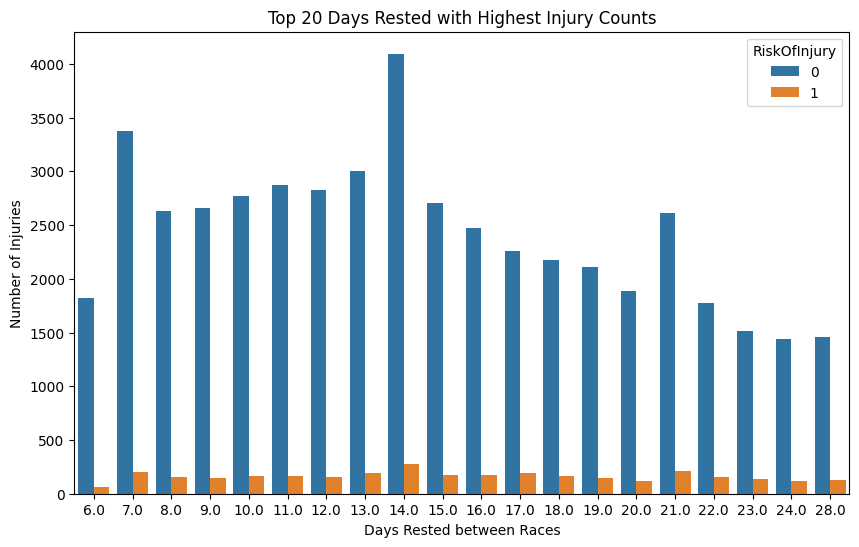

In [211]:
# horse's rest time between 2 races

races_horses_df["DaysRested"] = races_horses_df.groupby("Horse_ID")["date"].diff().dt.days

injury_counts = races_horses_df.groupby(['DaysRested' , 'RiskOfInjury']).size().reset_index(name="InjuryCounts")

# original graph is too large so limiting to top 20 

injury_by_rest_total = injury_counts.groupby('DaysRested')['InjuryCounts'].sum().reset_index()

top20 = injury_counts.nlargest(20 , 'InjuryCounts').reset_index(drop=True)

top20data = injury_counts[injury_counts['DaysRested'].isin(top20['DaysRested'])]

# plot
plt.figure(figsize=(10, 6))

sns.barplot(data = top20data , x = "DaysRested" , y = "InjuryCounts", hue = "RiskOfInjury")
plt.title("Top 20 Days Rested with Highest Injury Counts")
plt.xlabel("Days Rested between Races")
plt.ylabel("Number of Injuries")
plt.show()

# pattern of mostly resting for intervals of 7 days , 14 days , 21 days 


We see there is a pattern of 7 day  , 14 day , 21 day, interval spikes for days rested.

#### <a id='toc2_1_6_9_'></a>[Injury Based on Number of Races / Year](#toc0_)

In [212]:
# do horses that run more races have a higher risk of injury ?

# sort data by horse and race date
races_horses_df = races_horses_df.sort_values(by=["Horse_ID", "date"])

# cumulative race count per horse
races_horses_df["RacesRun"] = races_horses_df.groupby("Horse_ID").cumcount() + 1  # starts from 1

# group by 'horseName' to get total races run and injury risk
agg_horses = races_horses_df.groupby('Horse_ID').agg(TotalRaces=('RacesRun', 'max'), InjuryRisk=('RiskOfInjury', 'max')).reset_index()

print(agg_horses.head(10))

   Horse_ID  TotalRaces  InjuryRisk
0         0           1           0
1         1           5           0
2         2           1           0
3         3           3           0
4         4           7           0
5         5           1           0
6         6          19           1
7         7           3           0
8         8           1           0
9         9           1           1


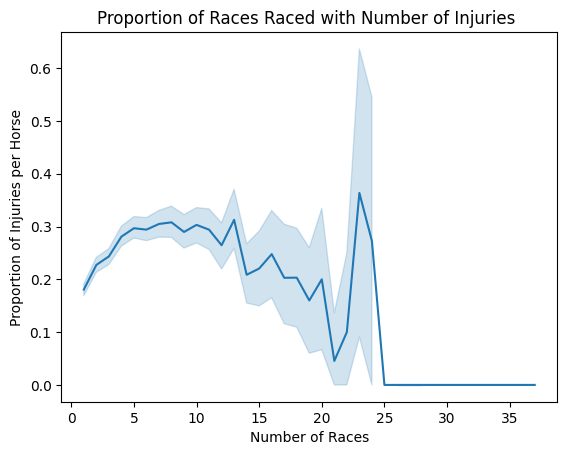

In [213]:
# plotting risk of injury based on more races

sns.lineplot(data = agg_horses , x = "TotalRaces" , y = "InjuryRisk")
plt.title("Proportion of Races Raced with Number of Injuries ")
plt.xlabel("Number of Races")
plt.ylabel("Proportion of Injuries per Horse")
plt.show()


There is a spike of injuries increasing around 20 through 25 races; therefore this seems to be a cap of when horses start to become weak. However, after 25 races there seems to be information on certain horses who were able to pass that cap and surprisingly raise no injuries while reaching up to 35 races in the year! This is an intersting subset of horses we can look deeper into.

#### <a id='toc2_1_6_10_'></a>[Subset of Horses Racing 25+ with No Injuries](#toc0_)

In [214]:
# looking at races 25 and up

twentyfiveplus_horses = agg_horses[agg_horses["TotalRaces"] >= 25]

In [215]:
# sanity check

twentyfiveplus_horses.head(25)

,Horse_ID,TotalRaces,InjuryRisk
79,80,27,0
3433,3439,27,0
3983,3990,27,0
4802,4809,26,0
5493,5503,28,0
5972,5984,26,0
6491,6503,26,0
10062,10085,37,0
10685,10709,27,0
11638,11665,25,0


In [216]:
# EDA on "exceptional" horses subset

twentyfiveplus_horses.head()

,Horse_ID,TotalRaces,InjuryRisk
79,80,27,0
3433,3439,27,0
3983,3990,27,0
4802,4809,26,0
5493,5503,28,0


In [217]:
# grab the 25 plus horses full df's

twentyfivehorses = list(twentyfiveplus_horses["Horse_ID"])

twentyfiveplus_horses = races_horses_df[races_horses_df["Horse_ID"].isin(twentyfivehorses)]

In [ ]:
# sanity check

twentyfiveplus_horses.head()

,rid,age,saddle,position,OR,weight,Horse_ID,date,condition,hurdles,metric,ncond,class,fences,RiskOfInjury,DaysRested,RacesRun
1073,357816,4,4.0,6,49,58,80,2000-01-05,Standard,0,1609.0,0,4,0,0,NaN,1
5511,356905,4,3.0,2,44,57,80,2000-01-26,Standard,0,1206.0,0,4,0,0,21.0,2
8108,286953,4,3.0,6,47,57,80,2000-02-07,Standard,0,1206.0,0,4,0,0,12.0,3
14140,67171,4,5.0,8,44,54,80,2000-03-04,Standard,0,1206.0,0,6,0,0,26.0,4
19875,369177,4,14.0,2,35,55,80,2000-03-30,Good,0,1407.0,1,6,0,0,26.0,5


##### <a id='toc2_1_6_10_1_'></a>[Analyzing Their Track Conditions](#toc0_)

In [219]:
# sorting track conditions

# total races per ncond
totalraces = twentyfiveplus_horses["ncond"].value_counts()

# 0 = standard or NaN condition (most common would be standard which means that "In UK horse racing, 
# "Standard" is a track condition used for All-Weather (AW) racing (synthetic surfaces like Polytrack, Tapeta, or Fibresand). It indicates a normal racing surface, 
# neither too fast nor too slow.")

/var/folders/y9/047nsvmd0f78b5tp5d55l6hw0000gn/T/ipykernel_87842/1892833989.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=totalraces.index, y=totalraces.values , order=totalraces.index).set_xticklabels(conditions)


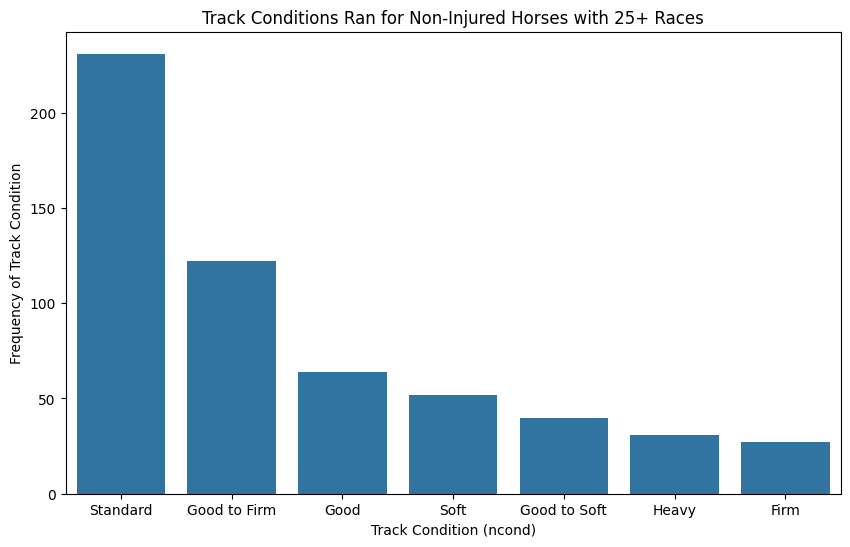

In [220]:
# plotting track conditions of all 25 non-injured horses 

conditions = ["Standard" , "Good to Firm" , "Good" , "Soft" , "Good to Soft" , "Heavy" , "Firm"]

plt.figure(figsize=(10, 6))

sns.barplot(x=totalraces.index, y=totalraces.values , order=totalraces.index).set_xticklabels(conditions)
plt.title("Track Conditions Ran for Non-Injured Horses with 25+ Races")
plt.xlabel("Track Condition (ncond)")
plt.ylabel("Frequency of Track Condition")

plt.show()


# 0 = standard , 2 = good to firm , 1 = good , 5 = soft , 10 = good to soft, 9 = heavy , 8 = firm


# we see no soft to heavy which was high for injury BUT good to soft and soft are here (minimal) which were top 3 in injury risk

Interestingly enough, we see no soft to heavy which was high for injury BUT good to soft and soft are here (minimal) which were top 3 in injury risk.

### <a id='toc2_1_7_'></a>[Saving Data for Modelling](#toc0_)

In [221]:
# csv for modelling 

races_horses_df.to_csv('modelling_df.csv', index=False)

In [223]:
races_horses_df.head()

,rid,age,saddle,position,OR,weight,Horse_ID,date,condition,hurdles,metric,ncond,class,fences,RiskOfInjury,DaysRested,RacesRun
92114,331875,3,9.0,9,0,51,0,2000-10-28,Heavy,0,1609.0,9,0,0,0,NaN,1
23682,196779,2,1.0,6,0,54,1,2000-04-13,Good To Soft,0,1105.5,10,4,0,0,NaN,1
30069,383212,2,1.0,7,0,54,1,2000-05-04,Good To Firm,0,1105.5,2,4,0,0,21.0,2
37120,90359,2,2.0,9,0,53,1,2000-05-20,Good,0,1206.0,1,6,0,0,16.0,3
41610,84566,2,1.0,6,0,53,1,2000-06-01,Good To Soft,0,1206.0,10,5,0,0,12.0,4


We now have a better understanding of our dataset and how to work with it. Next, we will explore modelling to figure out which will be the best model for predicting accurately injuries prior to a race.